Get Tweets from this URL [https://www.goodreads.com/author/quotes/399523.Imran_Khan](https://www.goodreads.com/author/quotes/399523.Imran_Khan)

1. Scrap the website and extract the Imran khan's quotes from the given link. https://www.goodreads.com/author/quotes/399523.Imran_Khan
2. Quotes counts. 
3. Sentence counts 
4. Word counts 
5. Count the occurrences of "a, an and the" 
6. Characters count 
7. Stop words count 
8. Upper case word counts 
9. Common Occurring word count 
10. Lower case 
11. Contraction to Expansion 
12. Removal of accented characters 
13. Removal of Stop Words 
14. Common Occurring words Removal 
15. Rare Occurring words Removal 
16. Word Cloud 
17. Spelling Correction 
18. Tokenization 
19. Lemmatization 
20. Detecting Entities using NER 
21. Noun Detection 
22. Language Detection 
23. Sentence Translation (English to Urdu) 
24. Sentiment of each quote 
25. Check the similarity in quote.


### Scrapping Quotes from the URL

In [106]:
import urllib.request
from html.parser import HTMLParser
import re

In [107]:
class QuotesParser(HTMLParser):
    def __init__(self):
        HTMLParser.__init__(self)
        self.recording = 0
        self.data = []

    def handle_starttag(self, tag, attributes):
        if tag != 'div':
            return
        if self.recording:
            self.recording += 1
            return
        for name, value in attributes:
            if name == 'class' and value == 'quoteText':
                break
        else:
            return
        self.recording = 1

    def handle_endtag(self, tag):
        if tag == 'div' and self.recording:
            self.recording -= 1

    def handle_data(self, data):
        if self.recording:
            self.data.append(data)

In [108]:
# Total Number of pages
pages = 2

# Raw HTML Data
html_list = []

# Raw Quotes Data
raw_quotes = []


# Quote List
quotes = []

In [109]:
for page_num in range(1, pages+1):
    url_to_parse = f'https://www.goodreads.com/author/quotes/399523.Imran_Khan?page={page_num}'

    url = urllib.request.urlopen(url_to_parse)
    html_list.append(url.read().decode())
    url.close()

In [110]:
for html in html_list:
    quotesParser = QuotesParser()

    quotesParser.feed(html)
    quotesParser.close()

    raw_quotes.extend(quotesParser.data)

In [111]:
# Cleaning quotes raw_data
temp = []
holder = []

for item in raw_quotes:
    if(len(holder) == 0):
        if(item.find('“') != -1 and item.find('”') != -1):
            temp.append(item)
        elif(item.find('“') != -1 and item.find('”') == -1):
            holder.append(item)
    else:
        if(item.find('”') != -1):
            holder.append(item)
            temp.append("\n".join(holder))
            holder = []
        else:
            holder.append(item)
            
for quote in temp:
    start = quote.index('“')
    end = quote.index('”')
    quotes.append(quote[start+1:end])

In [112]:
quotes

['It is not defeat that destroys you,it is being demoralized by defeat that destroy you.',
 'The more you study, the more you know; how less you know.',
 'I have always believed that one should not be scared of losing,I think that really is the key.',
 "Never give up, no matter how hard life gets no matter how much pain you feel. Pain will eventually subside, nothing remains forever, so keep going and don't give up.",
 'Lack of rule of law is the main reason Pakistan could not join the ranks of progressive nations.',
 'Are we Pakistanis, children of a lesser God? Is there one law for the west and one for us? Is our democracy supposed to be only democracy if you give us a no objection certificate?',
 'Compromise for your Dream but NEVER Compromise on your Dream.',
 'We must speak the truth if we are to be a great nation',
 'Crime should not pay, it must be punished. Unfortunately, in Pakistan big crimes do get rewarded.',
 'Leader leads people. Leader does not follow public opinion',
 '

In [113]:
print(len(quotes))

40


---

### Preparing the Quotes for NLP Tasks

In [114]:
word_count = dict()
word_list = list()
lines = list()
sentences = list()

for quote in quotes:
  # removing numbers from the start of lines in ordered lists
  quote_lines = quote.split('\n')
  for index, line in enumerate(quote_lines):
    modified_line = re.sub('^[0-9]+\. ', '', line)
    modified_line = modified_line.replace(',', ', ')
    modified_line = modified_line.replace('  ', ' ')
    quote_lines[index] = modified_line

    # Extracting sentences from line
    sentences.extend(modified_line.split('.'))
  
  # Storing all lines in spereate list
  lines.extend(quote_lines)


  # Creating a word counte dictionary
  words = ("\n".join(quote_lines)).split()
  for word in words:
    word = word.replace(',', '')
    word = word.replace('.', '')
    word = word.replace(':', '')
    word = word.replace(';', '')

    word_list.append(word)
    
    if word in word_count:
      word_count[word] += 1
    else:
      word_count[word] = 1

In [115]:
# Cleaning the sentences list
def text_cleaner(text):
    return text.strip()

sentences = filter(len, sentences)
sentences = filter(lambda item: (item != ' '), sentences)
sentences = list(map(text_cleaner, sentences))
# sentences

In [116]:
all_quotes_string = '. '.join(sentences)

In [117]:
# Library import and Stop_words
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [118]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(all_quotes_string)
print(tokenized_word)

['It', 'is', 'not', 'defeat', 'that', 'destroys', 'you', ',', 'it', 'is', 'being', 'demoralized', 'by', 'defeat', 'that', 'destroy', 'you', '.', 'The', 'more', 'you', 'study', ',', 'the', 'more', 'you', 'know', ';', 'how', 'less', 'you', 'know', '.', 'I', 'have', 'always', 'believed', 'that', 'one', 'should', 'not', 'be', 'scared', 'of', 'losing', ',', 'I', 'think', 'that', 'really', 'is', 'the', 'key', '.', 'Never', 'give', 'up', ',', 'no', 'matter', 'how', 'hard', 'life', 'gets', 'no', 'matter', 'how', 'much', 'pain', 'you', 'feel', '.', 'Pain', 'will', 'eventually', 'subside', ',', 'nothing', 'remains', 'forever', ',', 'so', 'keep', 'going', 'and', 'do', "n't", 'give', 'up', '.', 'Lack', 'of', 'rule', 'of', 'law', 'is', 'the', 'main', 'reason', 'Pakistan', 'could', 'not', 'join', 'the', 'ranks', 'of', 'progressive', 'nations', '.', 'Are', 'we', 'Pakistanis', ',', 'children', 'of', 'a', 'lesser', 'God', '?', 'Is', 'there', 'one', 'law', 'for', 'the', 'west', 'and', 'one', 'for', 'us'

In [120]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 492 samples and 1089 outcomes>


In [121]:
from nltk.stem import WordNetLemmatizer

In [122]:
# import library
import sys
!{sys.executable} -m pip install contractions
import contractions 

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

### Counts

**Quotes count:**

In [124]:
len(quotes)

40

**Sentence counts:**

In [125]:
len(sentences)

59

**Word counts:**

In [126]:
len(word_list)

960

**Unique Words Count**

In [127]:
len(word_count.keys())

489

**5. Count the occurrences of "a, an and the":**

In [128]:
f"""Counts:
a: {word_count['a']}
an: {word_count['an']}
the: {word_count['the']}"""

'Counts:\na: 23\nan: 3\nthe: 37'

**Characters count:**

In [129]:
len(all_quotes_string)

5476

**7. Stop words count:**

In [130]:
# Stop Words removed

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Quotes:",tokenized_word)
print("Filterd Quotes:",filtered_sent)

Tokenized Quotes: ['It', 'is', 'not', 'defeat', 'that', 'destroys', 'you', ',', 'it', 'is', 'being', 'demoralized', 'by', 'defeat', 'that', 'destroy', 'you', '.', 'The', 'more', 'you', 'study', ',', 'the', 'more', 'you', 'know', ';', 'how', 'less', 'you', 'know', '.', 'I', 'have', 'always', 'believed', 'that', 'one', 'should', 'not', 'be', 'scared', 'of', 'losing', ',', 'I', 'think', 'that', 'really', 'is', 'the', 'key', '.', 'Never', 'give', 'up', ',', 'no', 'matter', 'how', 'hard', 'life', 'gets', 'no', 'matter', 'how', 'much', 'pain', 'you', 'feel', '.', 'Pain', 'will', 'eventually', 'subside', ',', 'nothing', 'remains', 'forever', ',', 'so', 'keep', 'going', 'and', 'do', "n't", 'give', 'up', '.', 'Lack', 'of', 'rule', 'of', 'law', 'is', 'the', 'main', 'reason', 'Pakistan', 'could', 'not', 'join', 'the', 'ranks', 'of', 'progressive', 'nations', '.', 'Are', 'we', 'Pakistanis', ',', 'children', 'of', 'a', 'lesser', 'God', '?', 'Is', 'there', 'one', 'law', 'for', 'the', 'west', 'and', 

In [131]:
Quotes_with_SW =len(tokenized_word)

In [132]:
Quotes_without_SW =len(filtered_sent)

In [133]:
# Stop Words count

Stop_Words_Count = Quotes_with_SW - Quotes_without_SW
Stop_Words_Count

406

**8. Upper case word counts:**

In [134]:
len(list(filter(lambda word: word.isupper(), word_list)))

20

**9. Common Occurring word count:**


In [135]:
fdist.most_common(10)

[('.', 58),
 (',', 44),
 ('the', 37),
 ('of', 36),
 ('and', 34),
 ('to', 25),
 ('a', 23),
 ('is', 22),
 ('you', 13),
 ('be', 13)]

**10. Lower case:**

In [136]:
len(list(filter(lambda word: word.islower(), word_list)))

786

**11. Contraction to Expansion:**

In [137]:
# contracted text 
all_quotes_string

# creating an empty list 
expanded_words = []     
for word in all_quotes_string.split(): 
  # using contractions.fix to expand the shotened words 
  expanded_words.append(contractions.fix(word))    
    
expanded_text = ' '.join(expanded_words) 
print('Original text:\n ' + all_quotes_string)
print('\n')
print('Expanded_text:\n ' + expanded_text) 

Original text:
 It is not defeat that destroys you, it is being demoralized by defeat that destroy you. The more you study, the more you know; how less you know. I have always believed that one should not be scared of losing, I think that really is the key. Never give up, no matter how hard life gets no matter how much pain you feel. Pain will eventually subside, nothing remains forever, so keep going and don't give up. Lack of rule of law is the main reason Pakistan could not join the ranks of progressive nations. Are we Pakistanis, children of a lesser God? Is there one law for the west and one for us? Is our democracy supposed to be only democracy if you give us a no objection certificate?. Compromise for your Dream but NEVER Compromise on your Dream. We must speak the truth if we are to be a great nation. Crime should not pay, it must be punished. Unfortunately, in Pakistan big crimes do get rewarded. Leader leads people. Leader does not follow public opinion. Faith without wisdom 

**12. Removal of accented characters:**

In [138]:
def simplify(text):
	import unicodedata
	try:
		text = unicode(text, 'utf-8')
	except NameError:
		pass
	text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
	return str(text)
 
print(simplify(all_quotes_string))

It is not defeat that destroys you, it is being demoralized by defeat that destroy you. The more you study, the more you know; how less you know. I have always believed that one should not be scared of losing, I think that really is the key. Never give up, no matter how hard life gets no matter how much pain you feel. Pain will eventually subside, nothing remains forever, so keep going and don't give up. Lack of rule of law is the main reason Pakistan could not join the ranks of progressive nations. Are we Pakistanis, children of a lesser God? Is there one law for the west and one for us? Is our democracy supposed to be only democracy if you give us a no objection certificate?. Compromise for your Dream but NEVER Compromise on your Dream. We must speak the truth if we are to be a great nation. Crime should not pay, it must be punished. Unfortunately, in Pakistan big crimes do get rewarded. Leader leads people. Leader does not follow public opinion. Faith without wisdom and knowledge co

**13. Removal of Stop Words:**

In [139]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Quotes:",tokenized_word)
print(" Removal of Stop Words:",filtered_sent)

Tokenized Quotes: ['It', 'is', 'not', 'defeat', 'that', 'destroys', 'you', ',', 'it', 'is', 'being', 'demoralized', 'by', 'defeat', 'that', 'destroy', 'you', '.', 'The', 'more', 'you', 'study', ',', 'the', 'more', 'you', 'know', ';', 'how', 'less', 'you', 'know', '.', 'I', 'have', 'always', 'believed', 'that', 'one', 'should', 'not', 'be', 'scared', 'of', 'losing', ',', 'I', 'think', 'that', 'really', 'is', 'the', 'key', '.', 'Never', 'give', 'up', ',', 'no', 'matter', 'how', 'hard', 'life', 'gets', 'no', 'matter', 'how', 'much', 'pain', 'you', 'feel', '.', 'Pain', 'will', 'eventually', 'subside', ',', 'nothing', 'remains', 'forever', ',', 'so', 'keep', 'going', 'and', 'do', "n't", 'give', 'up', '.', 'Lack', 'of', 'rule', 'of', 'law', 'is', 'the', 'main', 'reason', 'Pakistan', 'could', 'not', 'join', 'the', 'ranks', 'of', 'progressive', 'nations', '.', 'Are', 'we', 'Pakistanis', ',', 'children', 'of', 'a', 'lesser', 'God', '?', 'Is', 'there', 'one', 'law', 'for', 'the', 'west', 'and', 

**14. Common Occurring words Removal:**

In [140]:
# Commonly occuring words are usually stop words like "is, am, are, there, they, him, her etc"
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(all_quotes_string)
print(tokenized_word)
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Quotes:",tokenized_word)
print(" Removal of Commonly occuring words:",filtered_sent)

['It', 'is', 'not', 'defeat', 'that', 'destroys', 'you', ',', 'it', 'is', 'being', 'demoralized', 'by', 'defeat', 'that', 'destroy', 'you', '.', 'The', 'more', 'you', 'study', ',', 'the', 'more', 'you', 'know', ';', 'how', 'less', 'you', 'know', '.', 'I', 'have', 'always', 'believed', 'that', 'one', 'should', 'not', 'be', 'scared', 'of', 'losing', ',', 'I', 'think', 'that', 'really', 'is', 'the', 'key', '.', 'Never', 'give', 'up', ',', 'no', 'matter', 'how', 'hard', 'life', 'gets', 'no', 'matter', 'how', 'much', 'pain', 'you', 'feel', '.', 'Pain', 'will', 'eventually', 'subside', ',', 'nothing', 'remains', 'forever', ',', 'so', 'keep', 'going', 'and', 'do', "n't", 'give', 'up', '.', 'Lack', 'of', 'rule', 'of', 'law', 'is', 'the', 'main', 'reason', 'Pakistan', 'could', 'not', 'join', 'the', 'ranks', 'of', 'progressive', 'nations', '.', 'Are', 'we', 'Pakistanis', ',', 'children', 'of', 'a', 'lesser', 'God', '?', 'Is', 'there', 'one', 'law', 'for', 'the', 'west', 'and', 'one', 'for', 'us'

**15. Rare Occurring words Removal:**

In [141]:
# I have removed all ither words except stop words. 
for_rarawords = list(stop_words)
type(for_rarawords)
print(list(for_rarawords))
for i in range(len(for_rarawords)):
    words = nltk.word_tokenize(for_rarawords[i])
    newwords = [word for word in words if word not in stopwords.words('english')]
    for_rarawords[i] = ' '.join(newwords)
newwords

['didn', 'in', 'our', 'myself', 'which', 's', 'haven', 'isn', 'hadn', 'if', 'nor', 'themselves', 'no', 'out', 'hasn', "wouldn't", 'against', 'but', 'off', 'all', 'down', 'mustn', "wasn't", 'are', 'most', "aren't", 'up', 'me', 'because', "couldn't", 'any', "you're", 'so', 'again', 'll', 'them', 'more', "isn't", 'have', 'what', 'herself', 'who', "you've", 'at', "shouldn't", "didn't", 'to', 'a', 'same', "you'll", 'its', 'both', 'now', 'i', "mustn't", 'you', 'her', "should've", "hadn't", 'y', 'here', 'has', 'been', 'being', 'shouldn', 'she', 'had', 'were', "won't", 'couldn', 'hers', 'ain', 'mightn', 'not', 'wasn', 'm', 'these', 'himself', 'is', 'with', 'other', 'won', 'my', "that'll", 'needn', 'yours', 'there', 'only', 'him', 'why', "hasn't", 'than', 'whom', 'between', 'where', 'yourselves', 'should', 'o', 'ma', 'doesn', 'or', 're', 've', 'under', 'this', 'yourself', 'some', "it's", 'shan', 'did', "needn't", "you'd", 'and', 'for', "mightn't", 'those', 'your', 'further', 'below', 'itself', 

[]

**16. Word Cloud**

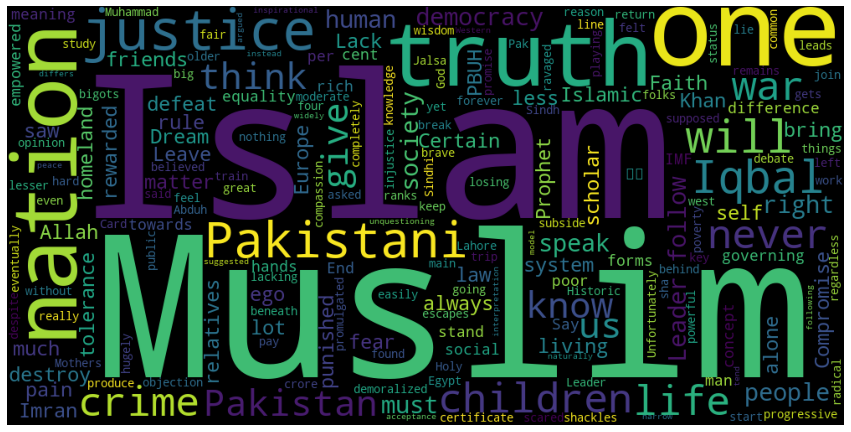

In [142]:
wordcloud = WordCloud(width = 1000, height = 500).generate(all_quotes_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

**17. Spelling Correction:**

In [143]:
x = all_quotes_string
x = TextBlob(x).correct()
x

TextBlob("It is not defeat that destroys you, it is being demoralized by defeat that destroy you. The more you study, the more you know; how less you know. I have always believed that one should not be scared of losing, I think that really is the key. Never give up, no matter how hard life gets no matter how much pain you feel. Pain will eventually subside, nothing remains forever, so keep going and don't give up. Back of rule of law is the main reason Pakistan could not join the ranks of progressive nations. Are we Pakistanis, children of a lesser God? Is there one law for the west and one for us? Is our democracy supposed to be only democracy if you give us a no objection certificate?. Compromise for your Dream but NEVER Compromise on your Dream. He must speak the truth if we are to be a great nation. Crime should not pay, it must be punished. Unfortunately, in Pakistan big crimes do get rewarded. Leader leads people. Leader does not follow public opinion. Faith without wisdom and kn

**18. Tokenization:**

In [144]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(all_quotes_string)
print(tokenized_word)

['It', 'is', 'not', 'defeat', 'that', 'destroys', 'you', ',', 'it', 'is', 'being', 'demoralized', 'by', 'defeat', 'that', 'destroy', 'you', '.', 'The', 'more', 'you', 'study', ',', 'the', 'more', 'you', 'know', ';', 'how', 'less', 'you', 'know', '.', 'I', 'have', 'always', 'believed', 'that', 'one', 'should', 'not', 'be', 'scared', 'of', 'losing', ',', 'I', 'think', 'that', 'really', 'is', 'the', 'key', '.', 'Never', 'give', 'up', ',', 'no', 'matter', 'how', 'hard', 'life', 'gets', 'no', 'matter', 'how', 'much', 'pain', 'you', 'feel', '.', 'Pain', 'will', 'eventually', 'subside', ',', 'nothing', 'remains', 'forever', ',', 'so', 'keep', 'going', 'and', 'do', "n't", 'give', 'up', '.', 'Lack', 'of', 'rule', 'of', 'law', 'is', 'the', 'main', 'reason', 'Pakistan', 'could', 'not', 'join', 'the', 'ranks', 'of', 'progressive', 'nations', '.', 'Are', 'we', 'Pakistanis', ',', 'children', 'of', 'a', 'lesser', 'God', '?', 'Is', 'there', 'one', 'law', 'for', 'the', 'west', 'and', 'one', 'for', 'us'

**19. Lemmatization:**

In [145]:
# Lemmatization
Lematized_Quotes = nltk.sent_tokenize(all_quotes_string)
lemmatizer = WordNetLemmatizer()

for i in range(len(Lematized_Quotes)):
    words = nltk.word_tokenize(Lematized_Quotes[i])
    newwords = [lemmatizer.lemmatize(word) for word in words]
    Lematized_Quotes[i] = ' '.join(newwords)

Lematized_Quotes

['It is not defeat that destroys you , it is being demoralized by defeat that destroy you .',
 'The more you study , the more you know ; how le you know .',
 'I have always believed that one should not be scared of losing , I think that really is the key .',
 'Never give up , no matter how hard life get no matter how much pain you feel .',
 "Pain will eventually subside , nothing remains forever , so keep going and do n't give up .",
 'Lack of rule of law is the main reason Pakistan could not join the rank of progressive nation .',
 'Are we Pakistanis , child of a lesser God ?',
 'Is there one law for the west and one for u ?',
 'Is our democracy supposed to be only democracy if you give u a no objection certificate ? .',
 'Compromise for your Dream but NEVER Compromise on your Dream .',
 'We must speak the truth if we are to be a great nation .',
 'Crime should not pay , it must be punished .',
 'Unfortunately , in Pakistan big crime do get rewarded .',
 'Leader lead people .',
 'Lead

In [146]:
# Lemmatization
Lematized_Quotes = nltk.sent_tokenize(all_quotes_string)
lemmatizer = WordNetLemmatizer()

for i in range(len(Lematized_Quotes)):
    words = nltk.word_tokenize(Lematized_Quotes[i])
    newwords = [lemmatizer.lemmatize(word) for word in words]
    Lematized_Quotes[i] = ' '.join(newwords)

Lematized_Quotes

['It is not defeat that destroys you , it is being demoralized by defeat that destroy you .',
 'The more you study , the more you know ; how le you know .',
 'I have always believed that one should not be scared of losing , I think that really is the key .',
 'Never give up , no matter how hard life get no matter how much pain you feel .',
 "Pain will eventually subside , nothing remains forever , so keep going and do n't give up .",
 'Lack of rule of law is the main reason Pakistan could not join the rank of progressive nation .',
 'Are we Pakistanis , child of a lesser God ?',
 'Is there one law for the west and one for u ?',
 'Is our democracy supposed to be only democracy if you give u a no objection certificate ? .',
 'Compromise for your Dream but NEVER Compromise on your Dream .',
 'We must speak the truth if we are to be a great nation .',
 'Crime should not pay , it must be punished .',
 'Unfortunately , in Pakistan big crime do get rewarded .',
 'Leader lead people .',
 'Lead

**20. Detecting Entities using NER:**

In [147]:
words = nltk.word_tokenize(all_quotes_string)
tagged_words = nltk.pos_tag(words)
namedEnt =nltk.ne_chunk(tagged_words)
print(tagged_words)

[('It', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('defeat', 'JJ'), ('that', 'IN'), ('destroys', 'VBZ'), ('you', 'PRP'), (',', ','), ('it', 'PRP'), ('is', 'VBZ'), ('being', 'VBG'), ('demoralized', 'VBN'), ('by', 'IN'), ('defeat', 'NN'), ('that', 'IN'), ('destroy', 'NN'), ('you', 'PRP'), ('.', '.'), ('The', 'DT'), ('more', 'RBR'), ('you', 'PRP'), ('study', 'VBP'), (',', ','), ('the', 'DT'), ('more', 'JJR'), ('you', 'PRP'), ('know', 'VBP'), (';', ':'), ('how', 'WRB'), ('less', 'RBR'), ('you', 'PRP'), ('know', 'VBP'), ('.', '.'), ('I', 'PRP'), ('have', 'VBP'), ('always', 'RB'), ('believed', 'VBN'), ('that', 'IN'), ('one', 'CD'), ('should', 'MD'), ('not', 'RB'), ('be', 'VB'), ('scared', 'VBN'), ('of', 'IN'), ('losing', 'NN'), (',', ','), ('I', 'PRP'), ('think', 'VBP'), ('that', 'IN'), ('really', 'RB'), ('is', 'VBZ'), ('the', 'DT'), ('key', 'NN'), ('.', '.'), ('Never', 'RB'), ('give', 'VBP'), ('up', 'RP'), (',', ','), ('no', 'DT'), ('matter', 'NN'), ('how', 'WRB'), ('hard', 'JJ'), ('life', 'NN'

In [148]:
# namedEnt.draw() 
print(namedEnt)

(S
  It/PRP
  is/VBZ
  not/RB
  defeat/JJ
  that/IN
  destroys/VBZ
  you/PRP
  ,/,
  it/PRP
  is/VBZ
  being/VBG
  demoralized/VBN
  by/IN
  defeat/NN
  that/IN
  destroy/NN
  you/PRP
  ./.
  The/DT
  more/RBR
  you/PRP
  study/VBP
  ,/,
  the/DT
  more/JJR
  you/PRP
  know/VBP
  ;/:
  how/WRB
  less/RBR
  you/PRP
  know/VBP
  ./.
  I/PRP
  have/VBP
  always/RB
  believed/VBN
  that/IN
  one/CD
  should/MD
  not/RB
  be/VB
  scared/VBN
  of/IN
  losing/NN
  ,/,
  I/PRP
  think/VBP
  that/IN
  really/RB
  is/VBZ
  the/DT
  key/NN
  ./.
  Never/RB
  give/VBP
  up/RP
  ,/,
  no/DT
  matter/NN
  how/WRB
  hard/JJ
  life/NN
  gets/VBZ
  no/DT
  matter/NN
  how/WRB
  much/RB
  pain/VBP
  you/PRP
  feel/VBP
  ./.
  (PERSON Pain/NNP)
  will/MD
  eventually/RB
  subside/VB
  ,/,
  nothing/NN
  remains/VBZ
  forever/RB
  ,/,
  so/RB
  keep/VB
  going/VBG
  and/CC
  do/VBP
  n't/RB
  give/VB
  up/RP
  ./.
  Lack/NNP
  of/IN
  rule/NN
  of/IN
  law/NN
  is/VBZ
  the/DT
  main/JJ
  reason/NN
  (GPE

**21. Noun Detection:**

In [149]:
# One Way for all POS

words = nltk.word_tokenize(all_quotes_string)
tagged_words = nltk.pos_tag(words)
tagged_words

# Second Way # Noun Detection
blob = TextBlob(all_quotes_string)
blob.tags
blob.noun_phrases

WordList(['never', 'hard life', 'pain', 'lack', 'main reason', 'pakistan', 'progressive nations', 'god', 'objection certificate', 'compromise', 'dream', 'never compromise', 'dream', 'great nation', 'pakistan', 'big crimes', 'public opinion', 'faith', 'prophet pbuh', 'justice system regardless', 'pak', 'mothers', 'speak truth', 'islam', 'islam', 'imran khan', 'historic lahore jalsa', 'ego ’ s', 'nation', 'poverty line', 'islamic', 'muhammad abduh', 'europe', 'egypt', 'muslims', 'europe', 'islam', "homeland 'there", 'muslims', 'islam', 'certain folks', 'sindh card', 'sindhi', 'allah', 'iqbal', "'s work", 'western democracy', 'islam', 'social justice', 'iqbal', "'s interpretation", 'islam', 'narrow meaning', 'iqbal', 'islam', 'certain beliefs', 'muslim', 'fundamental attitude', 'truth', 'allah', 'bravery', 'sensual pleasures', 'immoral war', 'vietnam', 'bombing villages', 'muslims', 'ilaaha ilalla', 'truth', 'right', 'say', 'imf', 'imf', "'s conditions enriches", 'good deeds', 'prophet', 

**22. Language Detection:**

In [150]:
from nltk import wordpunct_tokenize
wordpunct_tokenize(all_quotes_string)

from nltk.corpus import stopwords
stopwords.fileids()
stopwords.words('english')

languages_ratios = {}
tokens = wordpunct_tokenize(all_quotes_string)
words = [word.lower() for word in tokens]

In [151]:
for language in stopwords.fileids():
  stopwords_set = set(stopwords.words(language))
  words_set = set(words)
  common_elements = words_set.intersection(stopwords_set)
  languages_ratios[language] = len(common_elements) # language "score"
  
# languages_ratios

most_rated_language = max(languages_ratios, key=languages_ratios.get)

In [152]:
most_rated_language

'english'

**23. Sentence Translation (English to Urdu):**

In [153]:
from textblob import TextBlob

In [154]:
# blob = TextBlob(all_quotes_string)
# blob.tags
# blob.noun_phrases
# for sentence in blob.sentences:
#     print(sentence.sentiment.polarity)

In [155]:
blob = TextBlob(all_quotes_string)

In [156]:
blob.detect_language

<bound method BaseBlob.detect_language of TextBlob("It is not defeat that destroys you, it is being demoralized by defeat that destroy you. The more you study, the more you know; how less you know. I have always believed that one should not be scared of losing, I think that really is the key. Never give up, no matter how hard life gets no matter how much pain you feel. Pain will eventually subside, nothing remains forever, so keep going and don't give up. Lack of rule of law is the main reason Pakistan could not join the ranks of progressive nations. Are we Pakistanis, children of a lesser God? Is there one law for the west and one for us? Is our democracy supposed to be only democracy if you give us a no objection certificate?. Compromise for your Dream but NEVER Compromise on your Dream. We must speak the truth if we are to be a great nation. Crime should not pay, it must be punished. Unfortunately, in Pakistan big crimes do get rewarded. Leader leads people. Leader does not follow p

In [157]:
print(blob.translate(to = 'ur'))

یہ شکست نہیں ہے جو آپ کو تباہ کرتی ہے ، شکست کے ذریعہ اس کا دیدار کیا جارہا ہے جو آپ کو تباہ کرتا ہے۔ آپ جتنا زیادہ مطالعہ کریں گے ، اتنا ہی آپ جانتے ہو گے۔ تم کتنا کم جانتے ہو میں نے ہمیشہ یقین کیا ہے کہ ہارنے سے کسی کو خوفزدہ نہیں ہونا چاہئے ، مجھے لگتا ہے کہ واقعی اس کی کلید ہے۔ کبھی بھی ہمت نہیں ہارتے ، چاہے زندگی کتنی ہی مشکل سے دوچار ہوجائے ، چاہے آپ کتنا ہی درد محسوس کریں۔ آخر کار درد کم ہوجائے گا ، کچھ بھی ہمیشہ کے لئے باقی نہیں رہتا ہے ، لہذا چلتے رہیں اور ہار نہیں مانتے ہیں۔ قانون کی حکمرانی کا فقدان اس کی بنیادی وجہ ہے کہ پاکستان ترقی پسند اقوام کی صف میں شامل نہیں ہوسکا۔ کیا ہم پاکستانی ، کم خدا کے بچے ہیں؟ کیا مغرب کے لئے ایک قانون ہے اور ہمارے لئے ایک؟ اگر آپ ہمیں کوئی اعتراض سرٹیفکیٹ دیتے ہیں تو کیا ہماری جمہوریت صرف جمہوریت ہی سمجھی جاتی ہے؟ اپنے خواب کیلئے سمجھوتہ کریں لیکن اپنے خواب پر کبھی سمجھوتہ نہیں کریں۔ اگر ہمیں ایک عظیم قوم بننا ہے تو ہمیں سچ بولنا چاہئے۔ جرم نہیں ادا کرنا چاہئے ، اسے سزا ضرور ملنی چاہئے۔ بدقسمتی سے ، پاکستان میں بڑے جرائم کا بدلہ ملتا ہے۔ قائد

**24. Sentiment of the quote:**

In [158]:
print(blob)
blob.sentiment

It is not defeat that destroys you, it is being demoralized by defeat that destroy you. The more you study, the more you know; how less you know. I have always believed that one should not be scared of losing, I think that really is the key. Never give up, no matter how hard life gets no matter how much pain you feel. Pain will eventually subside, nothing remains forever, so keep going and don't give up. Lack of rule of law is the main reason Pakistan could not join the ranks of progressive nations. Are we Pakistanis, children of a lesser God? Is there one law for the west and one for us? Is our democracy supposed to be only democracy if you give us a no objection certificate?. Compromise for your Dream but NEVER Compromise on your Dream. We must speak the truth if we are to be a great nation. Crime should not pay, it must be punished. Unfortunately, in Pakistan big crimes do get rewarded. Leader leads people. Leader does not follow public opinion. Faith without wisdom and knowledge co

Sentiment(polarity=0.11645068027210885, subjectivity=0.5327857142857143)